In [267]:
import pandas as pd
from matplotlib.dates import MonthLocator, DateFormatter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
import calendar



In [ ]:
# import preprocessed data
df = pd.read_csv("preprocessed_df.csv")
# print(max(df.temperature_Celsius.to_list()))
l = df.temperature_Celsius.to_list() #xxxx TBC
l.max()

AttributeError: 'list' object has no attribute 'max'

In [ ]:
# Calculate descriptice statistics for complete dataset
# Location
min = round(min(df.temperature_Celsius), 2)
max = round(max(df.temperature_Celsius), 2)
mean = round(statistics.mean(df.temperature_Celsius), 2)
median = round(statistics.median(df.temperature_Celsius), 2)
mode = round(statistics.mode(df.temperature_Celsius), 2)
# Variance
variance = round(statistics.variance(df.temperature_Celsius), 2)
std = round(statistics.stdev(df.temperature_Celsius), 2)
quantiles = statistics.quantiles(df.temperature_Celsius)
q1 = quantiles[0]
q2 = quantiles[1]
q3 = quantiles[2]
iqr = q3 - q1

stats_dict = {
    "Min": min,
    "Max": max,
    "Mean": mean,
    "Median": median,
    "Mode": mode,
    "Variance": variance,
    "Standard deviation": std,
    "25% quartile": q1,
    "50% quartile": q2,
    "75% quartile": q3
}

# Create DataFrame
stats_df = pd.DataFrame(list(stats_dict.items()), columns=["Metric", "Value"])
print("Descriptive Statistics")

stats_df


Descriptive Statistics


,Metric,Value
0,Min,-8.10
1,Max,29.50
2,Mean,12.30
3,Median,11.90
4,Mode,11.10
5,Variance,51.59
6,Standard deviation,7.18
7,25% quartile,6.80
8,50% quartile,11.90
9,75% quartile,18.40


In [ ]:
# Set theme for all plots
sns.set_theme(style="whitegrid", palette=None)


<Axes: xlabel='temperature_Celsius', ylabel='Count'>

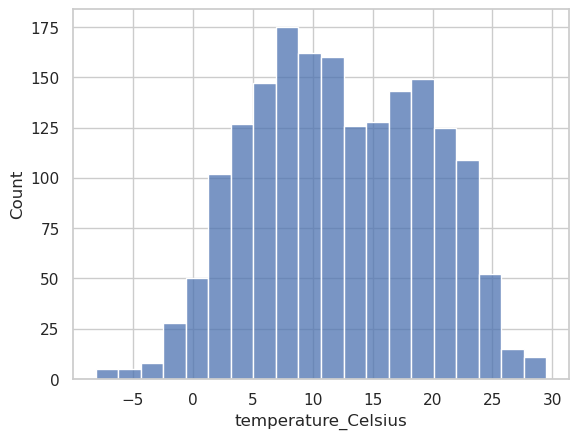

In [ ]:
# default histogram
sns.histplot(df, x="temperature_Celsius")

Text(0.5, 0, 'Temperature [°C]')

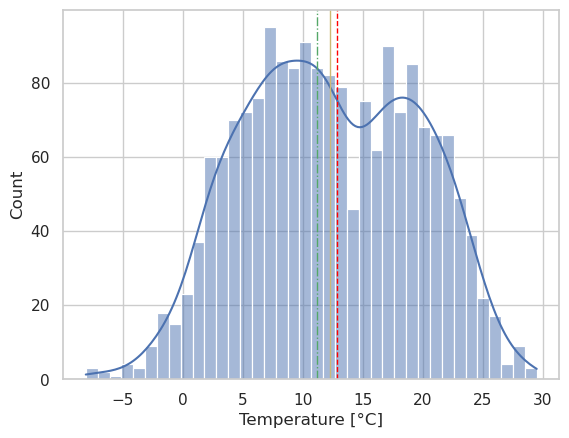

In [ ]:
# historgram with Estimated Probability Density Function and some metrics
sns.histplot(df, x="temperature_Celsius", kde=True, binwidth=1)

plt.axvline(x=stats_dict["Mean"], color='red', linestyle='--', linewidth=1, label='Mean')
plt.axvline(x=stats_dict["Mode"], color='g', linestyle='-.', linewidth=1, label='Mode')
plt.axvline(x=stats_dict["Median"], color='y', linestyle='-', linewidth=1, label='Median')
plt.xlabel("Temperature [°C]")

Text(0, 0.5, '')

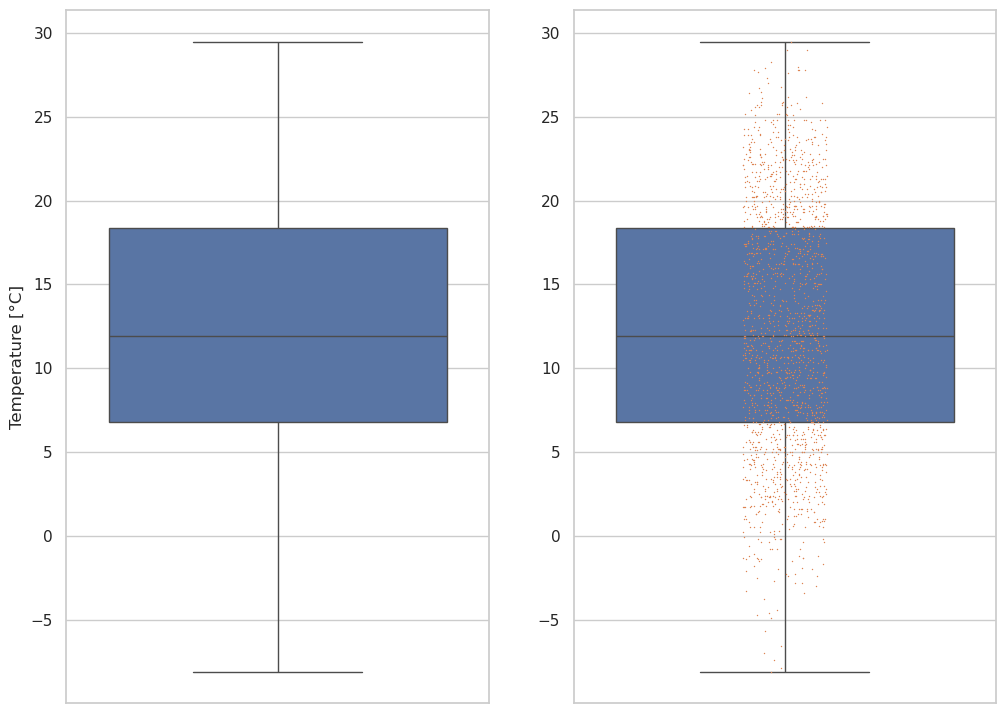

In [ ]:
fig = plt.figure(figsize=(12,9))
ax1 =fig.add_subplot(121)
# Standard box plot
sns.boxplot(y="temperature_Celsius", data=df, ax=ax1)
plt.ylabel("Temperature [°C]")

ax2=fig.add_subplot(122)
# Customized box plot with strip chart
sns.boxplot(y="temperature_Celsius", data=df, ax=ax2)
sns.stripplot(y="temperature_Celsius", data=df, size=1, ax=ax2)
plt.ylabel(None)


Text(0, 0.5, '')

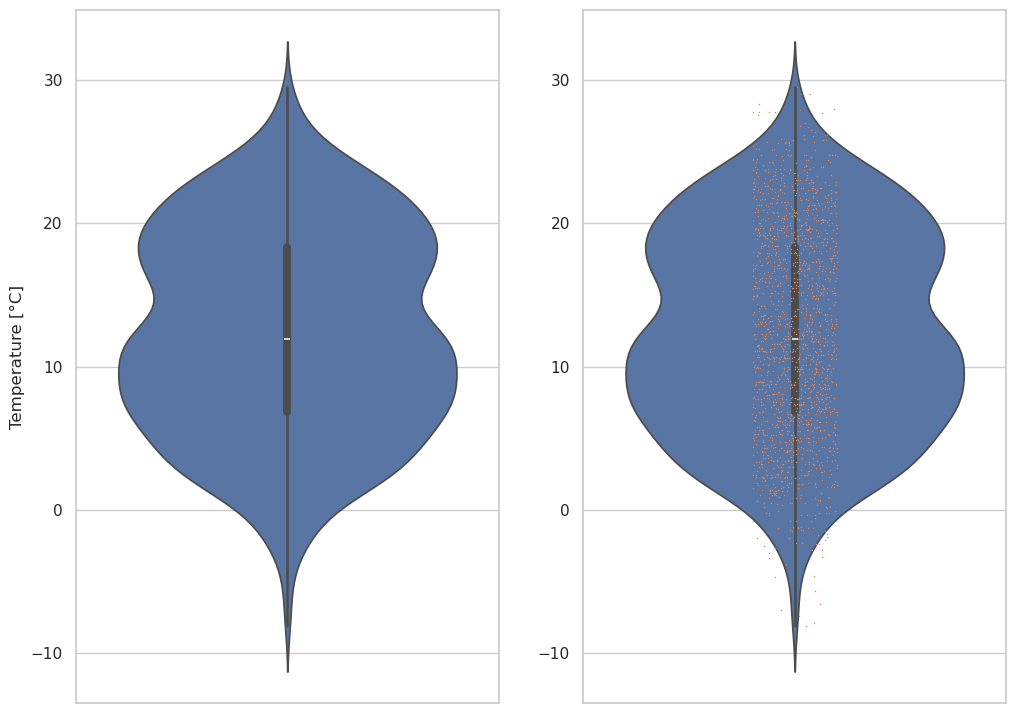

In [ ]:
fig = plt.figure(figsize=(12,9))
ax1 =fig.add_subplot(121)
# violin plot
sns.violinplot(y="temperature_Celsius", data=df, ax=ax1)
plt.ylabel("Temperature [°C]")

# violin plot with strip chart
ax2=fig.add_subplot(122)
sns.violinplot(y="temperature_Celsius", data=df, ax=ax2)
sns.stripplot(y="temperature_Celsius", data=df, size=1, ax=ax2)
plt.ylabel(None)


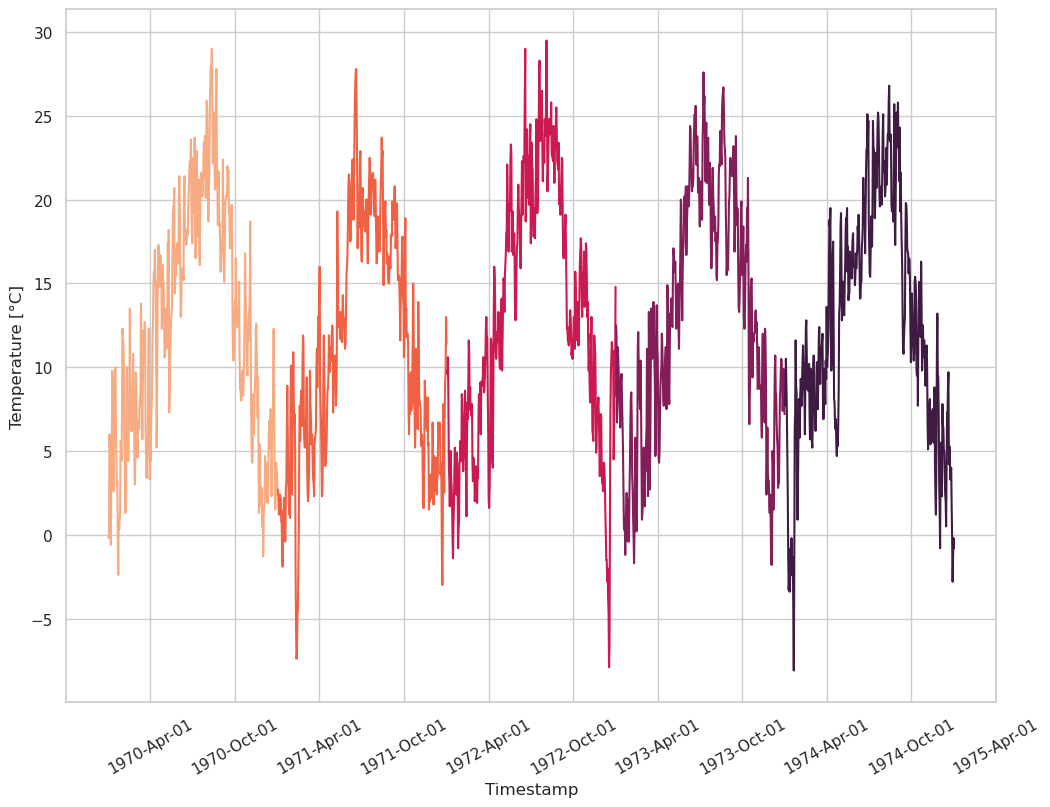

In [ ]:
# line plot 
plt.figure(figsize=(12,9))

ax = sns.lineplot(data=df, x="timestamp", y="temperature_Celsius", hue="year", palette=pal_hex, legend=None)
# Customize x-axis for monthly breaks
ax.xaxis.set_major_locator(MonthLocator(interval=6))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%b-%d'))
plt.xticks(rotation=30)
plt.xlabel("Timestamp")
plt.ylabel("Temperature [°C]")

plt.show()


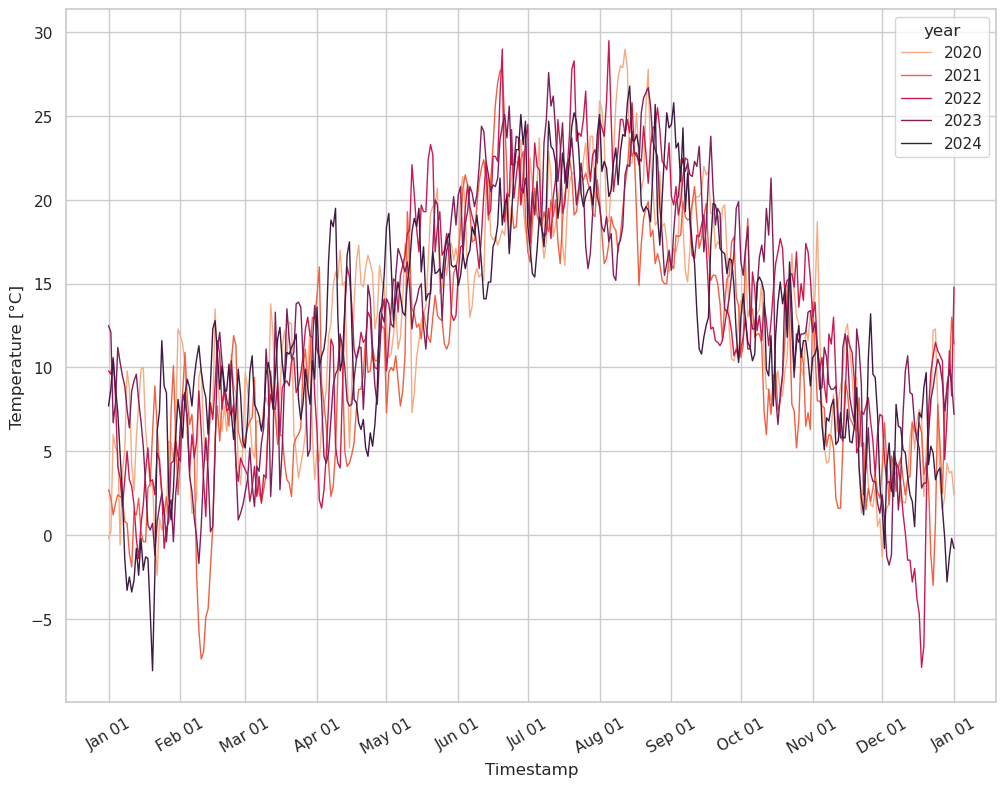

In [ ]:
fig = plt.figure(figsize=(12,9))

ax = sns.lineplot(data=df, x="timestamp_standard", y="temperature_Celsius", hue="year", linewidth=1,palette=pal_hex)
# Customize x-axis for monthly breaks
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
plt.xticks(rotation=30)
plt.xlabel("Timestamp")
plt.ylabel("Temperature [°C]")

plt.show()

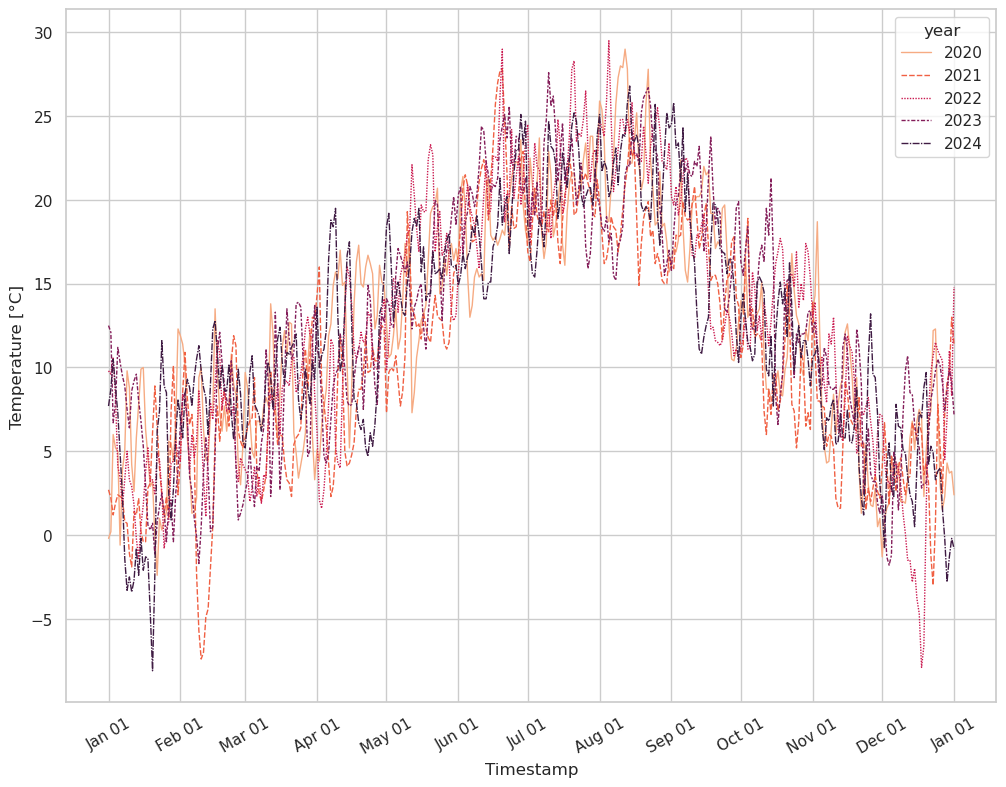

In [ ]:
# line plot with different colors and line styles
plt.figure(figsize=(12,9))
ax = sns.lineplot(data=df, x="timestamp_standard", y="temperature_Celsius", hue="year", style="year", linewidth=1, palette=pal_hex)
# Customize x-axis for monthly breaks
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
plt.xticks(rotation=30)
plt.xlabel("Timestamp")
plt.ylabel("Temperature [°C]")
plt.show()


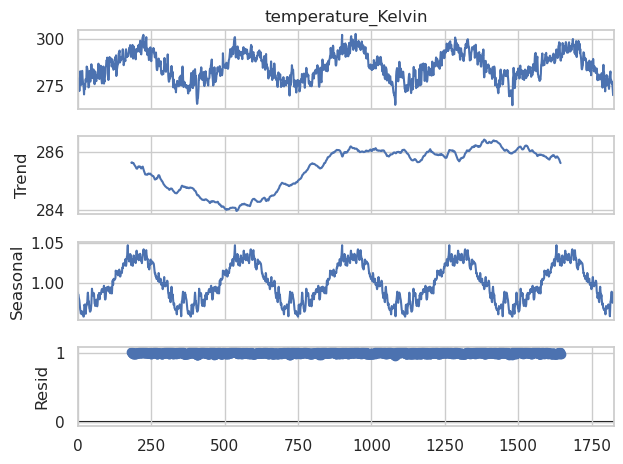

In [ ]:
#Time Series Decomposition. Top: Daily Temperature over the years, Second row: Trend, Third row: Seasonalytiy, Bottom: Noise.
#  Multiplicative seasonality is not appropriate for zero and negative values, therfore Kelvin was used.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
 
 
decomp = seasonal_decompose(df['temperature_Kelvin'],
                                  model='multiplicative',
                                  period=365)
decomp.plot()
plt.show()
 

Text(0.5, 0, 'Year')

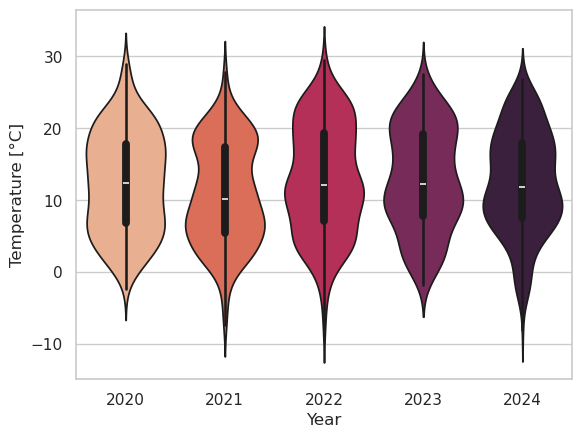

In [ ]:
sns.violinplot(x="year", y="temperature_Celsius", data=df, hue="year",  palette=pal_hex, legend=False)
plt.ylabel("Temperature [°C]")
plt.xlabel("Year")

In [ ]:
# Calculate statistics per year
yearly_statistics = []

for year_num in range(min(df["year"]), max(df["year"])+1):
    print(year_num)
    yearly_data = df.query(f"year == {year_num}")['temperature_Celsius']

    if not yearly_data.empty:
        stats_dict = {
            "Year": year_num,
            "Min": round(min(yearly_data), 2),
            "Max": round(max(yearly_data), 2),
            "Mean": round(statistics.mean(yearly_data), 2),
            "Median": round(statistics.median(yearly_data), 2),
            "Mode": statistics.mode(yearly_data),
            "Variance": round(statistics.variance(yearly_data), 2),
            "Standard deviation": round(statistics.stdev(yearly_data), 2)
        }
        yearly_statistics.append(stats_dict)

stats_df = pd.DataFrame(yearly_statistics)
# Statistics per year
print(stats_df)#.to_string(index=False)


TypeError: 'float' object is not callable

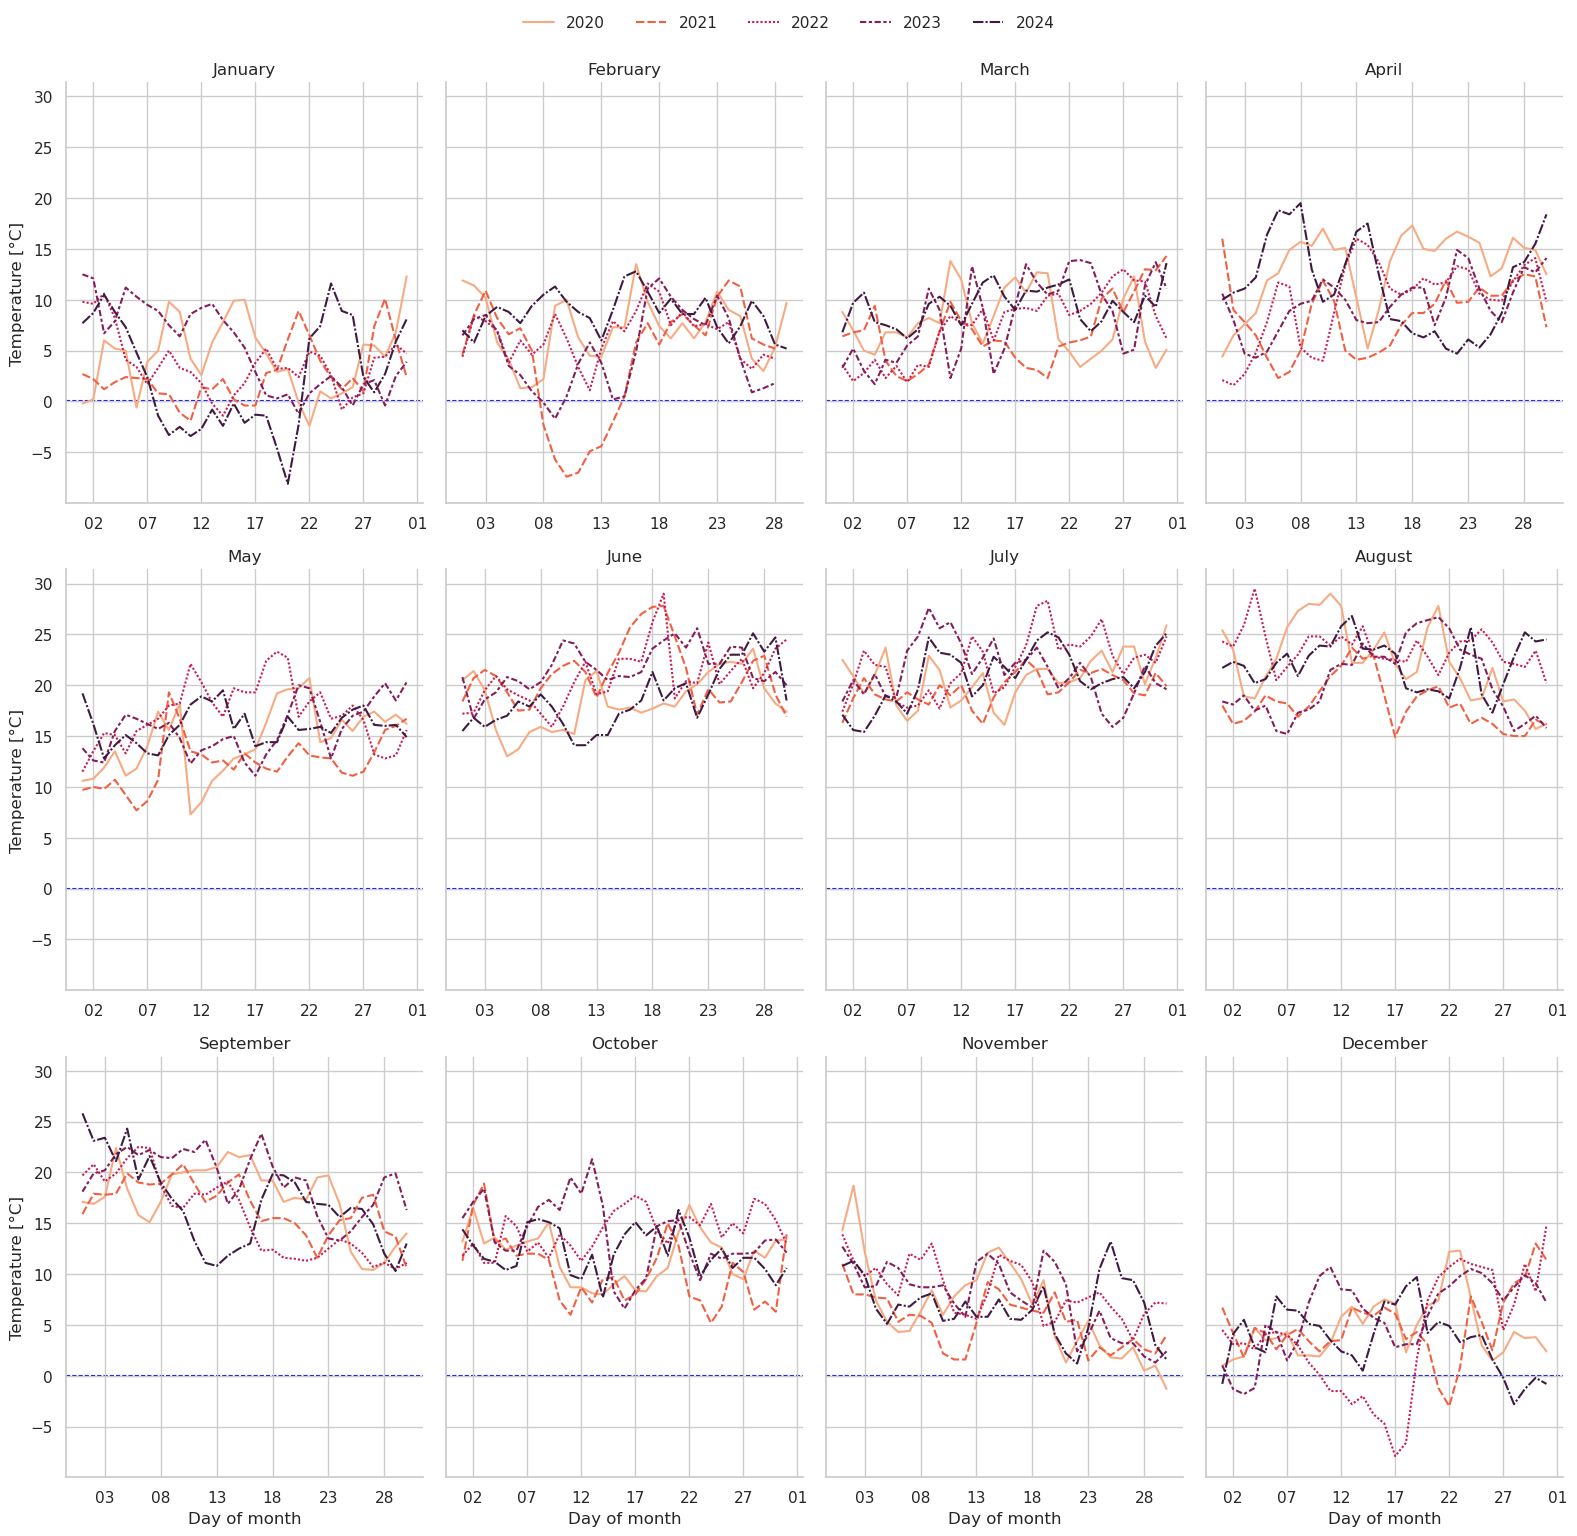

In [ ]:
# Plot the lines on 12 facets
g=sns.relplot(
    data=df,
    x="timestamp_standard", y="temperature_Celsius",
    hue="year", style="year", col="month_name", col_wrap=4,
    kind="line", palette=pal_hex,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

(g.map(plt.axhline, y=0, color="blue", dashes=(2, 1), zorder=0)
  .set_axis_labels("Day of month", "Temperature [°C]")
  .set_titles("{col_name}")
  .tight_layout(w_pad=0)
  )
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, 1), ncol=5, title=None, frameon=False,
)

  # Apply DayLocator and DateFormatter to all subplots
for ax in g.axes.flat:
    ax.xaxis.set_major_locator(DayLocator(interval=5))  # Ticks every 5 days
    ax.xaxis.set_major_formatter(DateFormatter('%d'))   # Format as "day"

plt.tight_layout()
plt.show()

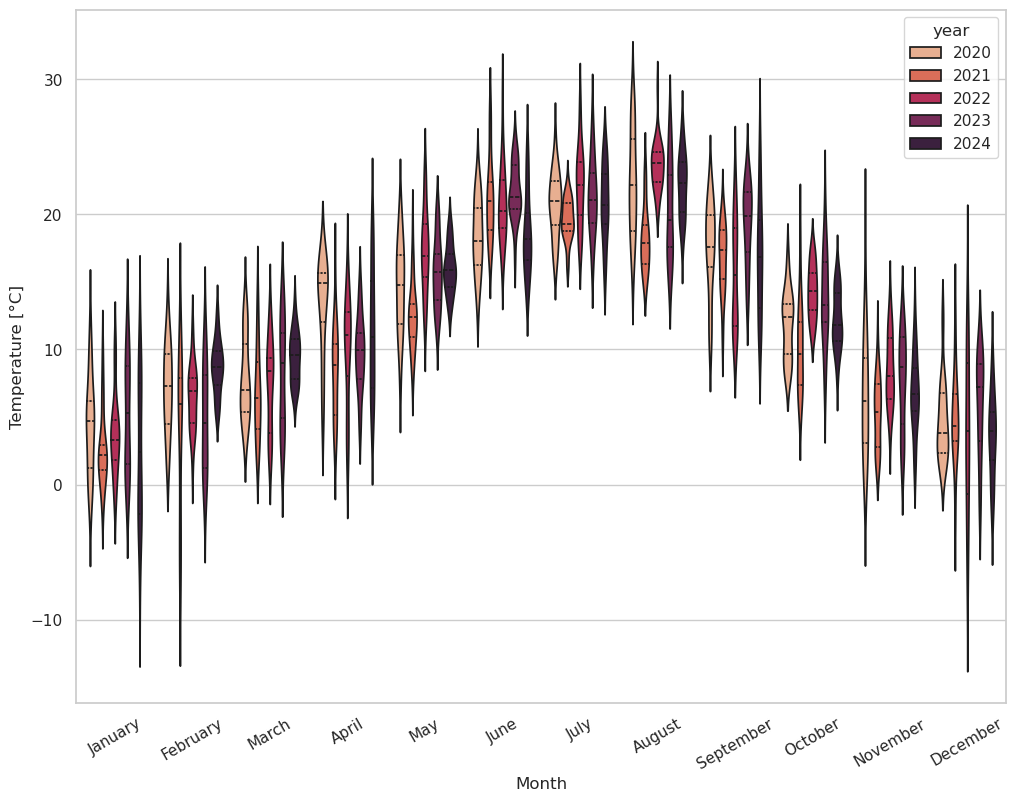

In [ ]:
plt.figure(figsize=(12,9))
ax = sns.violinplot(
    data=df,
    x="month_name", y="temperature_Celsius",
    hue="year", inner="quart",
    # col_wrap=4,
    # kind="violin",
     palette=pal_hex
    # height=5, aspect=.75, facet_kws=dict(sharex=False),
)
plt.xlabel("Month")
plt.ylabel("Temperature [°C]")
plt.xticks(rotation=30)
plt.legend
plt.show()
